# Librairies

In [14]:
import project_functions as pf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.figsize":(15, 6)},style="whitegrid")

# Portfolio

Importons les données :

In [15]:
# récupérons les données des prix sauvegardés dans le fichier prices.csv
datas = pd.read_csv('datas/prices.csv', sep=',')

# On récupère les tickers stockés dans le fichier tickers.txt
tickers = pf.get_tickers('datas/tickers.txt')

In [16]:
# Uniquement les prix liées aux tickers
prices = datas[["Date"]+tickers]

# On transforme la colonne Date en index
prices.set_index("Date", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,SBMO.AS,KPN.AS,BAMNB.AS,PNL.AS,PHIA.AS,REN.AS,AGN.AS,INGA.AS,SHELL.AS,AMUND.AS
Date,,,,,,,,,,
2010-01-04,10.353129,3.689740,4.795937,5.041500,13.832665,3.762785,2.645846,4.536896,10.527839,12.383609
2010-01-05,10.498744,3.702040,4.772008,5.094260,13.803706,3.721653,2.639794,4.624887,10.598575,12.383609
2010-01-06,10.655277,3.705114,4.731705,5.165778,13.591340,3.700648,2.630441,4.632377,10.522962,12.383609
2010-01-07,10.604313,3.637470,4.768229,5.155227,13.514114,3.646388,2.683808,4.742836,10.491251,12.383609
2010-01-08,10.728085,3.642081,4.961554,5.125916,13.533423,3.679208,2.766887,4.848926,10.430267,12.383609


Calculons les returns journaliers :

In [17]:
returns = pf.daily_asset_return(prices)

returns.head()

,SBMO.AS,KPN.AS,BAMNB.AS,PNL.AS,PHIA.AS,REN.AS,AGN.AS,INGA.AS,SHELL.AS,AMUND.AS
Date,,,,,,,,,,
2010-01-05,0.014065,0.003334,-0.004989,0.010465,-0.002094,-0.010931,-0.002287,0.019395,0.006719,0.0
2010-01-06,0.014910,0.000830,-0.008446,0.014039,-0.015385,-0.005644,-0.003543,0.001619,-0.007134,0.0
2010-01-07,-0.004783,-0.018257,0.007719,-0.002043,-0.005682,-0.014662,0.020288,0.023845,-0.003013,0.0
2010-01-08,0.011672,0.001268,0.040544,-0.005686,0.001429,0.009001,0.030955,0.022368,-0.005813,0.0
2010-01-11,0.018324,0.010131,-0.012565,0.008463,0.009510,-0.006898,-0.015510,-0.024839,0.003275,0.0


Nous devons définir une période d'entrainement et de test :
* la période d'entrainement est entre la première date disponible et le 1er Janvier 2015
* la période de test est entre la fin de l'entrainement et la dernière date disponible 

In [18]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

Il est nécessaire de séparer les données entre la phase d'entrainement et la phase de test.

In [19]:
returns_train, returns_test = pf.seperate_df(returns, begin_train, end_train, begin_test, end_test)

Nous pouvons déterminer les returns annualisés année grâce à la ligne de code suivante :

In [20]:
annu_returns_train = pf.annualy_asset_return(returns_train)

## Mean-Variance Portfolio

Let's compute the covariance matrix of the returns.

In [21]:
cov_matrix_train = returns_train.cov()

In [22]:
w1,r,v = pf.gmv_portfolio(returns_train,cov_matrix_train,show=True)

The portfolio return is: 11.48 %
The portfolio volatility is: 15.83 %


In [29]:
w,r,vol = pf.opt_mean_variance(returns_train,cov_matrix_train,obj_rend=0.1,risk_free=0.02624,show=True)

The portfolio return is: 10.0 %
The portfolio volatility is: 5.95 %


/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:49: RuntimeWarning: invalid value encountered in double_scalars
  return (df+1).prod()**(business_days/df.shape[0])-1


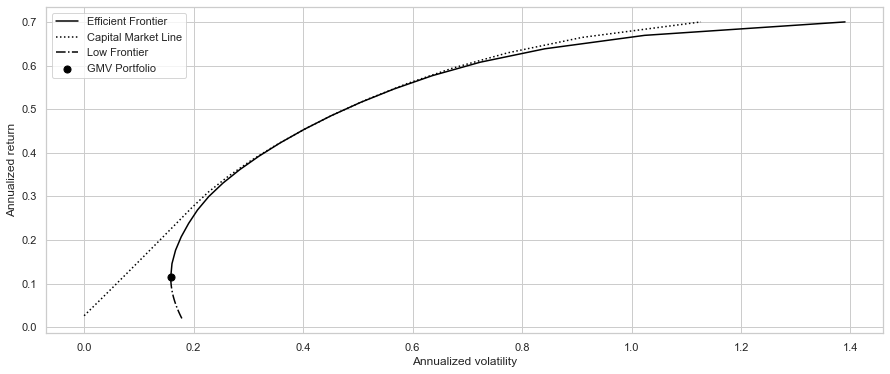

In [26]:
# plot the efficient frontier
eff, eff_rf = pf.efficient_frontier(returns_train,cov_matrix_train,min=0.02,max=0.7,number=20,risk_free=0.02624,plot=True)

Calculons le return du portfolio avec les poids souhaités sur la période de test :

In [30]:
prf = w["Risk Free"]
del w["Risk Free"]
rendements = pd.Series((returns_test*w).sum(axis=1),name="Portfolio")
rendement = pf.annualy_asset_return(rendements)
rendement += prf*0.02624
print("The portfolio return is:",round(rendement*100,2),"%")

The portfolio return is: 5.69 %
